In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [37]:
data=pd.read_csv('uber-raw-data-apr14.csv')
data
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [38]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Check if there are amy missing values

In [39]:
def num_missing(x):
    return sum(x.isnull())
print("Number of missing/null values per column")
print(data.apply(num_missing,axis=0))

Number of missing/null values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


### Extract Additional information

In [40]:
data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [59]:
data['Date/Time']=pd.to_datetime(data['Date/Time'],format="%m/%d/%Y %H:%M:%S")
data['DayofWeekNum']=data['Date/Time'].dt.dayofweek
data['DayofWeek']=data['Date/Time'].dt.weekday_name
data['DayNum']=data['Date/Time'].dt.day
data['HourofDay']=data['Date/Time'].dt.hour

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [45]:
data.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayNum,HourofDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [48]:
data.shape

(564516, 7)

In [50]:
data['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

## Total rides based on the base code

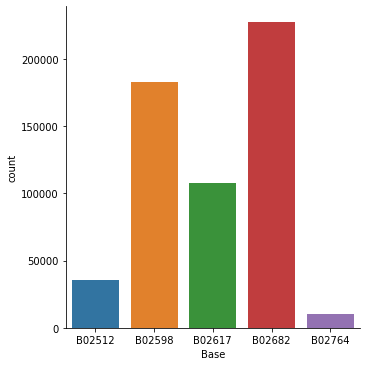

In [52]:
sns.catplot(x='Base',data=data,kind='count')

In [56]:
data_week=data.pivot_table(index=['DayofWeekNum','HourofDay'],values='Base',aggfunc='count')
data_week

Base
DayofWeekNum HourofDay      
0            0           518
             1           261
             2           238
             3           571
             4          1021
...                      ...
6            19         2579
             20         2276
             21         2310
             22         1639
             23         1018

[168 rows x 1 columns]

### Visualize the pivot table

<AxesSubplot:xlabel='DayofWeekNum,HourofDay'>

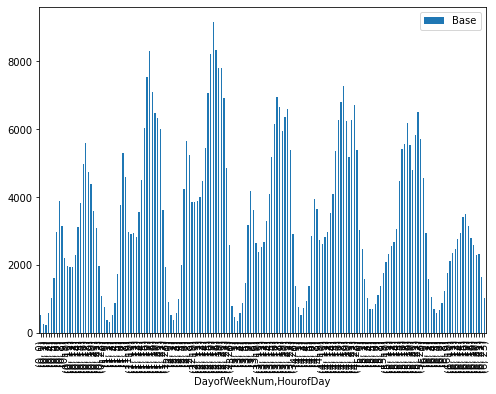

In [60]:
data_week.plot(kind='bar',figsize=(8,6))

<AxesSubplot:title={'center':'Hourly Journeys'}, xlabel='HourofDay'>

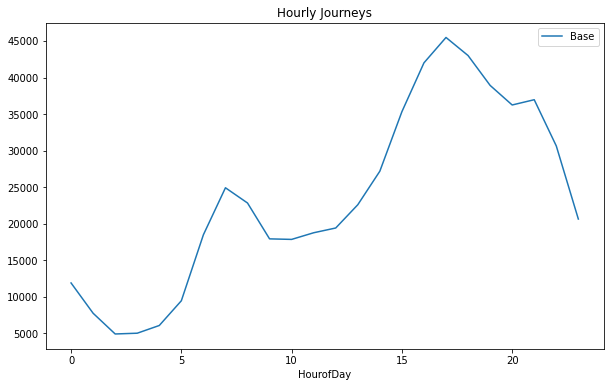

In [64]:
data_hour=data.pivot_table(index=['HourofDay'],values='Base',aggfunc='count')
data_hour.plot(kind='line',figsize=(10,6),title='Hourly Journeys')

<AxesSubplot:title={'center':'Journeys by DayNum'}, xlabel='DayNum'>

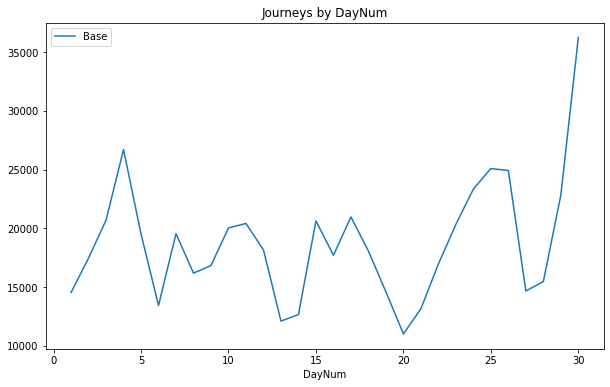

In [68]:
data_day=data.pivot_table(index=['DayNum'],values='Base',aggfunc='count')
data_day.plot(kind='line',figsize=(10,6),title="Journeys by DayNum")

<AxesSubplot:title={'center':'Journeys by DayNum'}, xlabel='DayNum'>

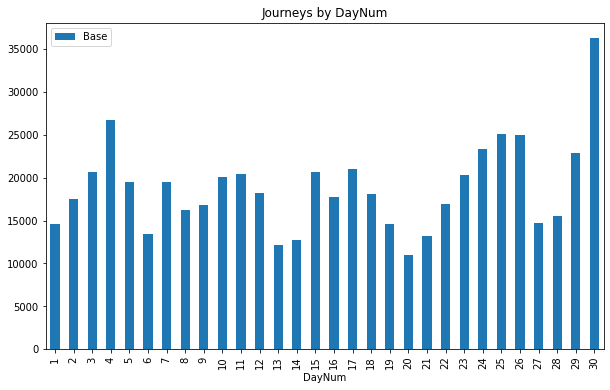

In [71]:
data_day=data.pivot_table(index='DayNum',values='Base',aggfunc='count')
data_day.plot(kind='bar',figsize=(10,6),title="Journeys by DayNum")

In [76]:
def count_row(rows):
    return len(rows)
by_date=data.groupby('DayNum').apply(count_row)
by_date

DayNum
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [78]:
by_date_sorted=by_date.sort_values()
by_date_sorted

DayNum
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

AttributeError: 'Rectangle' object has no property 'bin'

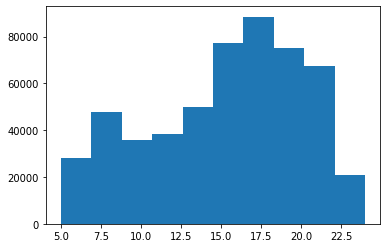

In [82]:
plt.hist(data.HourofDay,bin=24,range=(5,24))

In [86]:
count_row(data)
by_hour_weekday=data.groupby('HourofDay DayofWeekNum'.split()).apply(count_row).unstack()

<AxesSubplot:xlabel='DayofWeekNum', ylabel='HourofDay'>

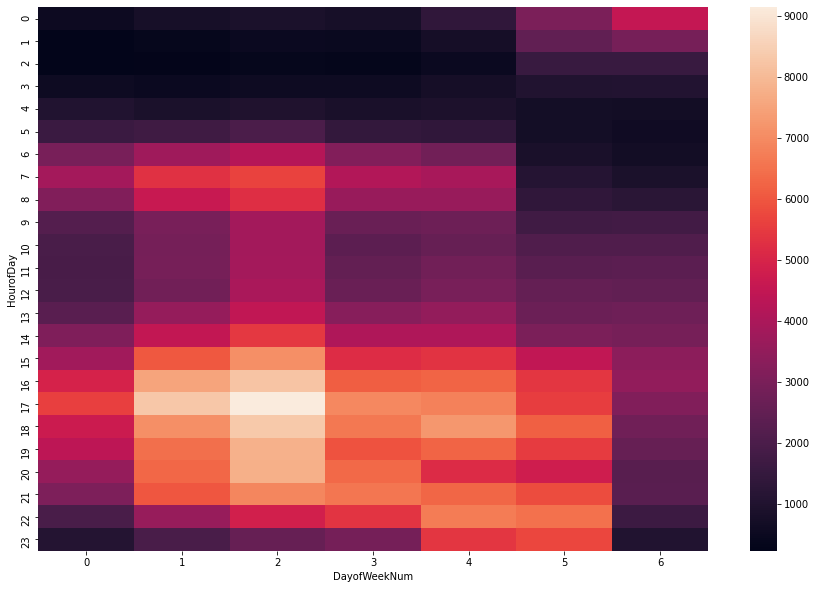

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(by_hour_weekday)